Objetivo: classificador k
means para separar regiões relacionadas nas imagens.

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sb 
from sklearn.cluster import KMeans
import cv2
import skimage
import skimage.exposure
import skimage.transform
import scipy.signal
import scipy

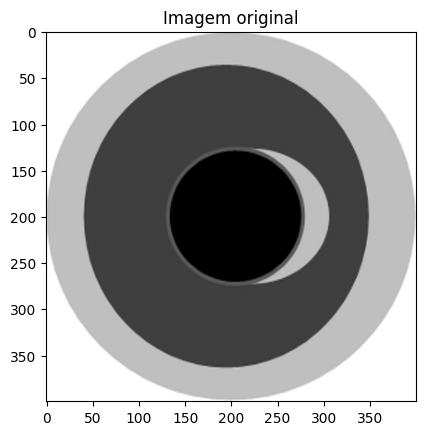

In [ ]:
image = cv2.imread(r"C:\Unifesp\redes_neurais\segmentacao_por_reconhecimento_de_padrao\ImagemFuzzyCluster01.pgm",0)
image = skimage.img_as_float(image)

(M,N) = np.shape(image)
plt.figure()
plt.title('Imagem  original')
plt.imshow(image, cmap = 'gray')

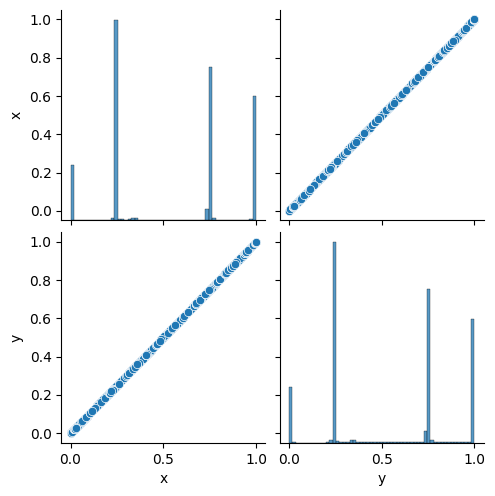

In [13]:
# Colocar valores de intensidade da imagem como um atributo
# Vetor matriz de intensidade
intensidade = image.flatten()

# Construir espaço de atributos - matriz que a coluna de intensidade é duplicada.
matriz_atributos = np.column_stack((intensidade,intensidade))

# Tranformar matriz_atributos em uma tabela no Pandas
# Obriagtoriamente, o seaborn.pairplor foi projetado para trabalhar no DataFrames do Pandas, por isso realizamos essa transformação.
tabela = pd.DataFrame({"x": matriz_atributos[:, 0].astype(float), "y": matriz_atributos[:,1].astype(float)})

sb.pairplot(tabela)



Separar o vetor de atributos usando K-means

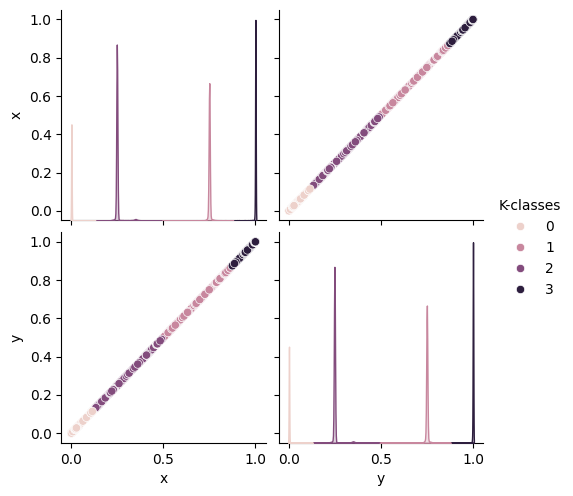

In [14]:
# Transformar para matriz numpy o DataFrame, pois a biblioteca do Kmeans prefere trabalhar com matrizes puras de números.
matriz_numpy = tabela.to_numpy()
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(matriz_numpy)
kmeans.labels_
# Na tabela original, criamos mais uma coluna para guardar o resultado obtido pelo modelo
tabela['K-classes'] = kmeans.labels_

sb.pairplot(tabela, hue = 'K-classes')

Selecionar classes específicas

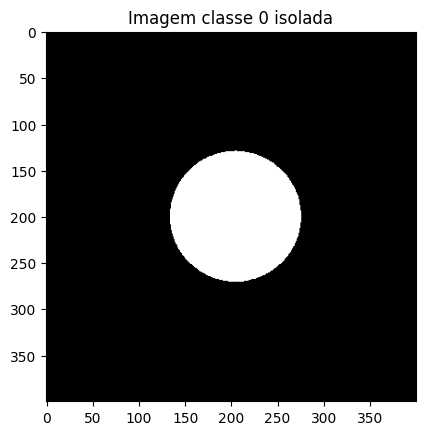

In [15]:
# Informação da coluna 2 (respectivo às classes) e passar para Numpy.
classes = tabela.iloc[:,[2]].to_numpy()

# Treinar modelo
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(classes)
resultados = kmeans.labels_

# Matriz classes
matriz_classes = resultados.reshape(M,N)
matriz_classe_bin = matriz_classes == 0

#Imagem
plt.figure()
plt.title('Imagem classe 0 isolada')
plt.imshow(matriz_classe_bin, cmap = 'gray')